In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math

In [3]:
#Reading CO2 emissions data for India
df=pd.read_excel("emissions.xlsx")
df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Country/Region,unit,1990.00,1991.00,1992.00,1993.00,1994.00,1995.00,1996.00,1997.00,...,2009.00,2010.00,2011.00,2012.00,2013.0,2014.00,2015.00,2016.00,2017.00,2018.00
1,India,tCO2e per capita,1.16,1.19,1.21,1.22,1.24,1.29,1.31,1.35,...,2.03,2.09,2.09,2.18,2.2,2.31,2.29,2.32,2.39,2.47
2,Data source,CAIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data for,Location: India. Sectors/Subsectors: Total inc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Filtering out the rows which contain  CO2 emissions and year data
df1=df[(df['Unnamed: 0']=='India')| (df['Unnamed: 1']=='unit')]
df1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Country/Region,unit,1990.00,1991.00,1992.00,1993.00,1994.00,1995.00,1996.00,1997.00,...,2009.00,2010.00,2011.00,2012.00,2013.0,2014.00,2015.00,2016.00,2017.00,2018.00
1,India,tCO2e per capita,1.16,1.19,1.21,1.22,1.24,1.29,1.31,1.35,...,2.03,2.09,2.09,2.18,2.2,2.31,2.29,2.32,2.39,2.47


In [5]:
#Transposing the selected data
df1=df1.T
df1

,0,1
Unnamed: 0,Country/Region,India
Unnamed: 1,unit,tCO2e per capita
Unnamed: 2,1990.0,1.16
Unnamed: 3,1991.0,1.19
Unnamed: 4,1992.0,1.21
Unnamed: 5,1993.0,1.22
Unnamed: 6,1994.0,1.24
Unnamed: 7,1995.0,1.29
Unnamed: 8,1996.0,1.31
Unnamed: 9,1997.0,1.35


In [6]:
#Dropping undesired rows
df1=df1.drop(['Unnamed: 0','Unnamed: 1'],axis=0)
df1


,0,1
Unnamed: 2,1990.0,1.16
Unnamed: 3,1991.0,1.19
Unnamed: 4,1992.0,1.21
Unnamed: 5,1993.0,1.22
Unnamed: 6,1994.0,1.24
Unnamed: 7,1995.0,1.29
Unnamed: 8,1996.0,1.31
Unnamed: 9,1997.0,1.35
Unnamed: 10,1998.0,1.36
Unnamed: 11,1999.0,1.41


In [7]:
#Renaming columns
df1.columns=['Year','CO2 equivalent emissions (metric tons per capita)']
df1


,Year,CO2 equivalent emissions (metric tons per capita)
Unnamed: 2,1990.0,1.16
Unnamed: 3,1991.0,1.19
Unnamed: 4,1992.0,1.21
Unnamed: 5,1993.0,1.22
Unnamed: 6,1994.0,1.24
Unnamed: 7,1995.0,1.29
Unnamed: 8,1996.0,1.31
Unnamed: 9,1997.0,1.35
Unnamed: 10,1998.0,1.36
Unnamed: 11,1999.0,1.41


In [8]:
#Reading GDP dataset
df2=pd.read_excel("gdp_data.xls")
df2


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03
1,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
2,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427109e+11,9.498491e+11,9.635604e+11,9.837486e+11,9.186471e+11,8.720235e+11,9.842556e+11,1.011723e+12,1.008375e+12,9.188155e+11
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
4,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709626e+11,7.275714e+11,8.207876e+11,8.514872e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
263,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
264,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
265,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


In [9]:
#Filtering out GDP data of India
df3=df2[(df2['Unnamed: 0']=='India')| (df2['Unnamed: 1']=='Country Code')]
df3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03
110,India,IND,GDP (current US$),NY.GDP.MKTP.CD,3.702988e+10,3.923244e+10,4.216148e+10,4.842192e+10,5.648029e+10,5.955485e+10,...,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.701112e+12,2.870504e+12,2.660245e+12


In [10]:
#Transposing
df3=df3.T
df3

,0,110
Unnamed: 0,Country Name,India
Unnamed: 1,Country Code,IND
Unnamed: 2,Indicator Name,GDP (current US$)
Unnamed: 3,Indicator Code,NY.GDP.MKTP.CD
Unnamed: 4,1960.0,37029883875.457275
...,...,...
Unnamed: 60,2016.0,2294797980509.005371
Unnamed: 61,2017.0,2651472946374.907227
Unnamed: 62,2018.0,2701111782775.027832
Unnamed: 63,2019.0,2870504096717.773438


In [11]:
#Dropping undesired rows
df4=df3.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3'],axis=0)
df4

,0,110
Unnamed: 4,1960.0,37029883875.457275
Unnamed: 5,1961.0,39232435784.094589
Unnamed: 6,1962.0,42161481858.701363
Unnamed: 7,1963.0,48421923458.741257
Unnamed: 8,1964.0,56480289940.826149
...,...,...
Unnamed: 60,2016.0,2294797980509.005371
Unnamed: 61,2017.0,2651472946374.907227
Unnamed: 62,2018.0,2701111782775.027832
Unnamed: 63,2019.0,2870504096717.773438


In [12]:
#Renaming columns
df4.columns=['Year','GDP (current US$)']
df4


,Year,GDP (current US$)
Unnamed: 4,1960.0,37029883875.457275
Unnamed: 5,1961.0,39232435784.094589
Unnamed: 6,1962.0,42161481858.701363
Unnamed: 7,1963.0,48421923458.741257
Unnamed: 8,1964.0,56480289940.826149
...,...,...
Unnamed: 60,2016.0,2294797980509.005371
Unnamed: 61,2017.0,2651472946374.907227
Unnamed: 62,2018.0,2701111782775.027832
Unnamed: 63,2019.0,2870504096717.773438


In [13]:
#Filtering data from 1990 to 2018
df4.drop(df4[((df4['Year']>=1960)&(df4['Year']<1990))|(df4['Year']>2018)].index,inplace=True)
df4

,Year,GDP (current US$)
Unnamed: 34,1990.0,320979026419.633423
Unnamed: 35,1991.0,270105341879.226379
Unnamed: 36,1992.0,288208430383.964417
Unnamed: 37,1993.0,279296022987.919373
Unnamed: 38,1994.0,327275583539.558655
Unnamed: 39,1995.0,360281952716.796814
Unnamed: 40,1996.0,392897054348.071045
Unnamed: 41,1997.0,415867753863.874329
Unnamed: 42,1998.0,421351477504.742981
Unnamed: 43,1999.0,458820417337.807068


In [14]:
#Converting units of GDP from US$ to billion(US$)
df4['GDP(billion US$)']=df4['GDP (current US$)']*pow(10,-9)
df4

,Year,GDP (current US$),GDP(billion US$)
Unnamed: 34,1990.0,320979026419.633423,320.979026
Unnamed: 35,1991.0,270105341879.226379,270.105342
Unnamed: 36,1992.0,288208430383.964417,288.20843
Unnamed: 37,1993.0,279296022987.919373,279.296023
Unnamed: 38,1994.0,327275583539.558655,327.275584
Unnamed: 39,1995.0,360281952716.796814,360.281953
Unnamed: 40,1996.0,392897054348.071045,392.897054
Unnamed: 41,1997.0,415867753863.874329,415.867754
Unnamed: 42,1998.0,421351477504.742981,421.351478
Unnamed: 43,1999.0,458820417337.807068,458.820417


In [15]:
#Merging CO2 and GDP dataset
dfnew=df1[["Year","CO2 equivalent emissions (metric tons per capita)"]].merge(df4[["Year","GDP(billion US$)"]],on="Year",how="left")
dfnew

                                         

,Year,CO2 equivalent emissions (metric tons per capita),GDP(billion US$)
0,1990.0,1.16,320.979026
1,1991.0,1.19,270.105342
2,1992.0,1.21,288.20843
3,1993.0,1.22,279.296023
4,1994.0,1.24,327.275584
5,1995.0,1.29,360.281953
6,1996.0,1.31,392.897054
7,1997.0,1.35,415.867754
8,1998.0,1.36,421.351478
9,1999.0,1.41,458.820417


In [16]:
#Reading energy consumption dataset
df6=pd.read_excel("energy.xlsx")
df6

,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932
1,Afghanistan,AFG,1981,662.913
2,Afghanistan,AFG,1982,709.075
3,Afghanistan,AFG,1983,877.846
4,Afghanistan,AFG,1984,905.948
...,...,...,...,...
8956,Zimbabwe,ZWE,2012,4251.322
8957,Zimbabwe,ZWE,2013,4200.829
8958,Zimbabwe,ZWE,2014,4127.801
8959,Zimbabwe,ZWE,2015,4027.628


In [17]:
#Filtering out data for India
df7=df6[(df6['Entity']=='India')]
df7

,Entity,Code,Year,Energy consumption per capita (kWh)
3723,India,IND,1965,1234.199
3724,India,IND,1966,1245.658
3725,India,IND,1967,1257.530
3726,India,IND,1968,1315.776
3727,India,IND,1969,1427.496
3728,India,IND,1970,1365.674
3729,India,IND,1971,1388.256
3730,India,IND,1972,1428.353
3731,India,IND,1973,1424.120
3732,India,IND,1974,1474.911


In [18]:
#Dropping undesired columns
df7=df7.drop(['Entity','Code'],axis=1)
df7

,Year,Energy consumption per capita (kWh)
3723,1965,1234.199
3724,1966,1245.658
3725,1967,1257.530
3726,1968,1315.776
3727,1969,1427.496
3728,1970,1365.674
3729,1971,1388.256
3730,1972,1428.353
3731,1973,1424.120
3732,1974,1474.911


In [19]:
#Filtering out data from 1990 to 2018
df7.drop(df7[((df7['Year']>=1965)&(df7['Year']<1990))|(df7['Year']>2018)].index,inplace=True)
df7

,Year,Energy consumption per capita (kWh)
3748,1990,2619.875
3749,1991,2707.062
3750,1992,2790.488
3751,1993,2804.242
3752,1994,2896.635
3753,1995,3055.456
3754,1996,3119.747
3755,1997,3232.300
3756,1998,3364.631
3757,1999,3393.381


In [20]:
#Merging energy consumption data with previously merged data
data=dfnew[["Year","CO2 equivalent emissions (metric tons per capita)","GDP(billion US$)"]].merge(df7[["Year","Energy consumption per capita (kWh)"]],on="Year",how="left")
ind_data=data  # Storing this data of India for plotting trend line later 
ind_data



,Year,CO2 equivalent emissions (metric tons per capita),GDP(billion US$),Energy consumption per capita (kWh)
0,1990.0,1.16,320.979026,2619.875
1,1991.0,1.19,270.105342,2707.062
2,1992.0,1.21,288.20843,2790.488
3,1993.0,1.22,279.296023,2804.242
4,1994.0,1.24,327.275584,2896.635
5,1995.0,1.29,360.281953,3055.456
6,1996.0,1.31,392.897054,3119.747
7,1997.0,1.35,415.867754,3232.300
8,1998.0,1.36,421.351478,3364.631
9,1999.0,1.41,458.820417,3393.381


In [21]:
#Saving it in excel format
data.to_excel("Finaldata.xlsx",index=False)

In [22]:
#Importing the new data
newdata=pd.read_excel("Finaldata.xlsx")
copy=newdata
copy

,Year,CO2 equivalent emissions (metric tons per capita),GDP(billion US$),Energy consumption per capita (kWh)
0,1990,1.16,320.979026,2619.875
1,1991,1.19,270.105342,2707.062
2,1992,1.21,288.208430,2790.488
3,1993,1.22,279.296023,2804.242
4,1994,1.24,327.275584,2896.635
5,1995,1.29,360.281953,3055.456
6,1996,1.31,392.897054,3119.747
7,1997,1.35,415.867754,3232.300
8,1998,1.36,421.351478,3364.631
9,1999,1.41,458.820417,3393.381


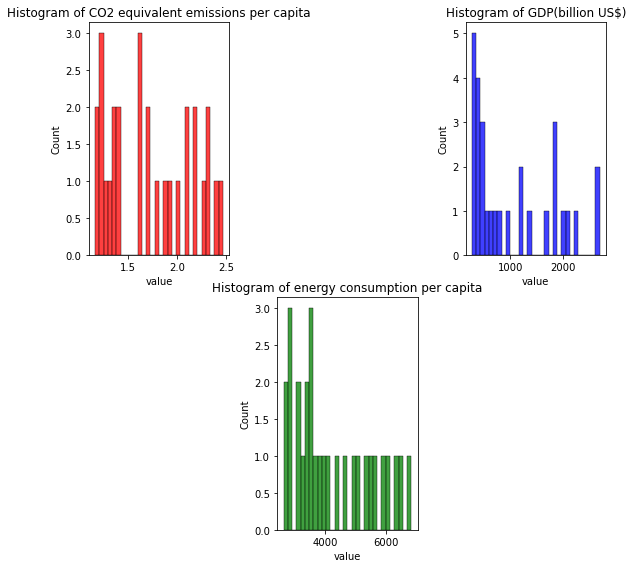

In [23]:
plt.figure(figsize=(8,8))
#Histogram plot of CO2 
plt.subplot(2,3,1)
sns.histplot(newdata["CO2 equivalent emissions (metric tons per capita)"],bins=30,color='red')
plt.title("Histogram of CO2 equivalent emissions per capita")
plt.xlabel('value')

#Histogram plot of GDP
plt.subplot(2,3,3)
sns.histplot(newdata["GDP(billion US$)"],bins=30,color='blue')
plt.title("Histogram of GDP(billion US$)")
plt.xlabel('value')

#Histogram plot of energy
plt.subplot(2,3,5)
sns.histplot(newdata["Energy consumption per capita (kWh)"],bins=30,color='green')
plt.title("Histogram of energy consumption per capita")
plt.xlabel('value')
plt.tight_layout()
plt.show()

Text(0.5, 1.2, 'Scatter plots')

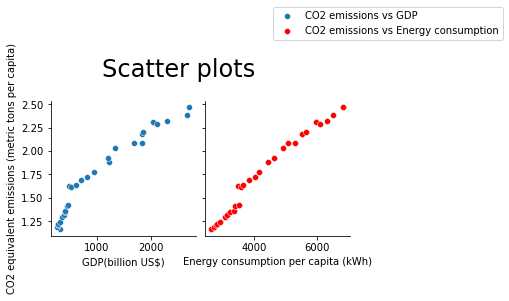

In [24]:
#Scatter plots for visualisation
s=sns.pairplot(newdata,x_vars=["GDP(billion US$)","Energy consumption per capita (kWh)"],y_vars=["CO2 equivalent emissions (metric tons per capita)"])
s.map_upper(sns.scatterplot,color='red')
plt.legend(labels=["CO2 emissions vs GDP","CO2 emissions vs Energy consumption"],bbox_to_anchor=(2.05,1.7),loc='upper right',borderaxespad=0)
s.fig.suptitle("Scatter plots",fontsize=24,y=1.2)

In [25]:
#Generating the correlation matrix
r=copy.corr()
r




,Year,CO2 equivalent emissions (metric tons per capita),GDP(billion US$),Energy consumption per capita (kWh)
Year,1.000000,0.991384,0.946445,0.976368
CO2 equivalent emissions (metric tons per capita),0.991384,1.000000,0.966000,0.984904
GDP(billion US$),0.946445,0.966000,1.000000,0.990534
Energy consumption per capita (kWh),0.976368,0.984904,0.990534,1.000000


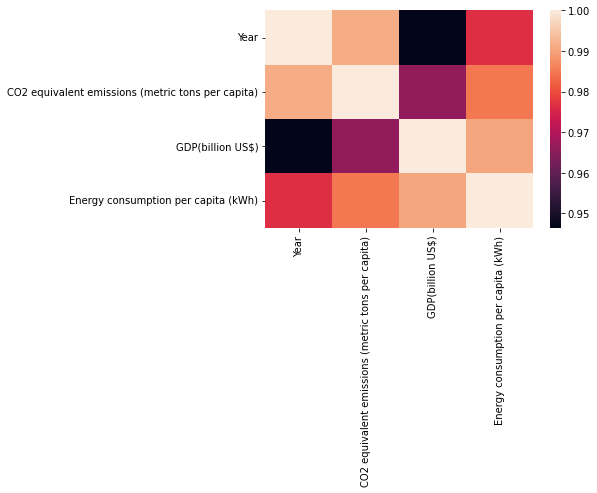

In [26]:
sns.heatmap(r)
#Log transformation of independent variables for regression analysis
newdata['Log(GDP(billion US$))']=np.log(newdata['GDP(billion US$)'])
newdata['Log(Energy consumption per capita (kWh))']=np.log(newdata['Energy consumption per capita (kWh)'])
newdata=newdata.drop(['GDP(billion US$)','Energy consumption per capita (kWh)'],axis=1)


In [27]:
copy

,Year,CO2 equivalent emissions (metric tons per capita),GDP(billion US$),Energy consumption per capita (kWh),Log(GDP(billion US$)),Log(Energy consumption per capita (kWh))
0,1990,1.16,320.979026,2619.875,5.771376,7.870882
1,1991,1.19,270.105342,2707.062,5.598812,7.903619
2,1992,1.21,288.208430,2790.488,5.663684,7.933972
3,1993,1.22,279.296023,2804.242,5.632272,7.938889
4,1994,1.24,327.275584,2896.635,5.790803,7.971305
5,1995,1.29,360.281953,3055.456,5.886887,8.024684
6,1996,1.31,392.897054,3119.747,5.973548,8.045507
7,1997,1.35,415.867754,3232.300,6.030367,8.080949
8,1998,1.36,421.351478,3364.631,6.043467,8.121074
9,1999,1.41,458.820417,3393.381,6.128659,8.129582


In [28]:
#Generating correlation matrix heatmap


In [29]:
#New correlation matrix
r1=newdata.corr()
r1

,Year,CO2 equivalent emissions (metric tons per capita),Log(GDP(billion US$)),Log(Energy consumption per capita (kWh))
Year,1.000000,0.991384,0.985792,0.993086
CO2 equivalent emissions (metric tons per capita),0.991384,1.000000,0.990675,0.993084
Log(GDP(billion US$)),0.985792,0.990675,1.000000,0.991882
Log(Energy consumption per capita (kWh)),0.993086,0.993084,0.991882,1.000000


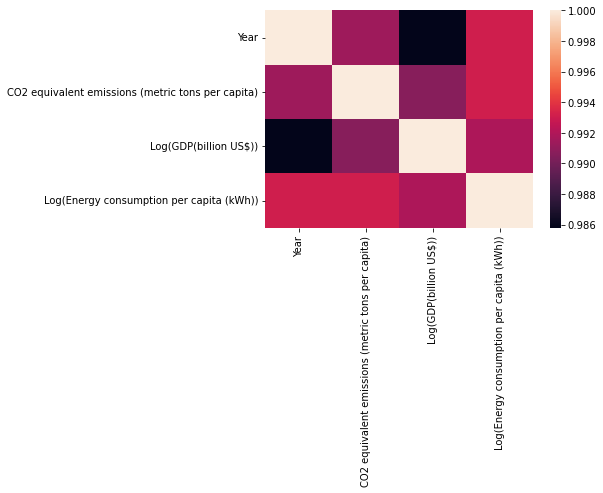

In [30]:
#New heatmap
sns.heatmap(r1)
plt.savefig('new heatmap')

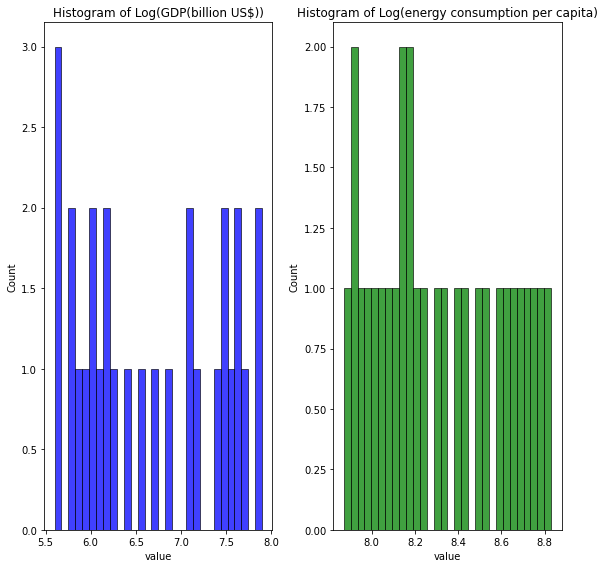

In [31]:
#New Histogram plot for Log(GDP)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.histplot(newdata["Log(GDP(billion US$))"],color='blue',bins=30)
plt.title("Histogram of Log(GDP(billion US$))")
plt.xlabel('value')
#New Histogram plot for Log(energy)
plt.subplot(1,2,2)
sns.histplot(newdata["Log(Energy consumption per capita (kWh))"],color='green',bins=30)
plt.title("Histogram of Log(energy consumption per capita)")
plt.xlabel('value')
plt.tight_layout()
plt.show()

In [32]:
# Simple linear regression statistics of CO2 emissions with Log(GDP)
x=newdata['Log(GDP(billion US$))']
X=x
y=newdata['CO2 equivalent emissions (metric tons per capita)']
x=sm.add_constant(x)  #Adding a constant for intercept 
model=sm.OLS(y,x).fit()  #Fitting the model
y_pred=model.predict(x)  
model.summary()  



C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                           
=============================================================================================================
Dep. Variable:     CO2 equivalent emissions (metric tons per capita)   R-squared:                       0.981
Model:                                                           OLS   Adj. R-squared:                  0.981
Method:                                                Least Squares   F-statistic:                     1427.
Date:                                               Wed, 09 Mar 2022   Prob (F-statistic):           6.50e-25
Time:                                                       21:58:55   Log-Likelihood:                 41.899
No. Observations:                                                 29   AIC:                            -79.80
Df Residuals:                                                     27   BIC:                            -77.06
Df Model:                                                          1                                         
Covariance Type:                                           nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8653      0.096    -19.427      0.000      -2.062      -1.668
Log(GDP(billion US$))     0.5393      0.014     37.782      0.000       0.510       0.569
==============================================================================
Omnibus:                        4.779   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                3.159
Skew:                           0.745   Prob(JB):                        0.206
Kurtosis:                       3.629   Cond. No.                         60.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Simple linear regression statistics of CO2 emissions with Log(energy)
x1=newdata['Log(Energy consumption per capita (kWh))']
X1=x1
y1=newdata['CO2 equivalent emissions (metric tons per capita)']
x1=sm.add_constant(x1)  #Adding a constant for intercept
model1=sm.OLS(y1,x1).fit()  #Fitting the model
y_pred1=model1.predict(x1)
y_pred1
model1.summary()


C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                           
=============================================================================================================
Dep. Variable:     CO2 equivalent emissions (metric tons per capita)   R-squared:                       0.986
Model:                                                           OLS   Adj. R-squared:                  0.986
Method:                                                Least Squares   F-statistic:                     1932.
Date:                                               Wed, 09 Mar 2022   Prob (F-statistic):           1.17e-26
Time:                                                       21:58:59   Log-Likelihood:                 46.214
No. Observations:                                                 29   AIC:                            -88.43
Df Residuals:                                                     27   BIC:                            -85.69
Df Model:                                                          1                                         
Covariance Type:                                           nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                      -10.0722      0.269    -37.458      0.000     -10.624      -9.520
Log(Energy consumption per capita (kWh))     1.4208      0.032     43.951      0.000       1.354       1.487
==============================================================================
Omnibus:                        1.047   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.250
Skew:                          -0.137   Prob(JB):                        0.882
Kurtosis:                       3.363   Cond. No.                         240.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Multiple linear regression statistics of CO2 emissions with energy consumption and GDP 
x2=newdata[['Log(GDP(billion US$))','Log(Energy consumption per capita (kWh))']]
X2=x2
y2=newdata['CO2 equivalent emissions (metric tons per capita)']
x2=sm.add_constant(x2) #Adding a constant for intercept
model2=sm.OLS(y2,x2).fit()  #Fitting the model
y_pred2=model2.predict(x2)
y_pred2
model2.summary()


C:\Users\avishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                           
=============================================================================================================
Dep. Variable:     CO2 equivalent emissions (metric tons per capita)   R-squared:                       0.988
Model:                                                           OLS   Adj. R-squared:                  0.987
Method:                                                Least Squares   F-statistic:                     1088.
Date:                                               Wed, 09 Mar 2022   Prob (F-statistic):           8.68e-26
Time:                                                       17:13:51   Log-Likelihood:                 48.458
No. Observations:                                                 29   AIC:                            -90.92
Df Residuals:                                                     26   BIC:                            -86.81
Df Model:                                                          2                                         
Covariance Type:                                           nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -7.2199      1.391     -5.192      0.000     -10.078      -4.361
Log(GDP(billion US$))                        0.1903      0.091      2.086      0.047       0.003       0.378
Log(Energy consumption per capita (kWh))     0.9247      0.240      3.856      0.001       0.432       1.418
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.398
Skew:                           0.733   Prob(JB):                        0.111
Kurtosis:                       4.221   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

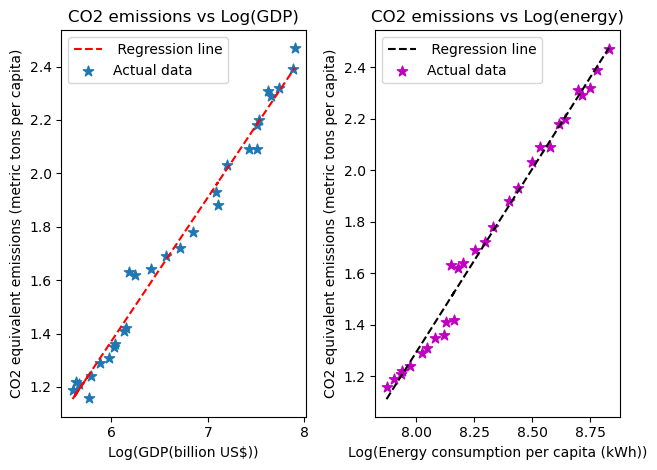

In [165]:
# Simple linear regression plot for CO2 emission with Log(GDP)
plt.subplot(1,2,1)
plt.scatter(X,y,marker="*",s=60)
plt.plot(X,y_pred,'r--')
plt.title('CO2 emissions vs Log(GDP)')
plt.xlabel('Log(GDP(billion US$))')
plt.ylabel('CO2 equivalent emissions (metric tons per capita)')
plt.legend([" Regression line","Actual data"])

# Simple linear regression plot for CO2 emission with Log(energy)
plt.subplot(1,2,2)
plt.scatter(X1,y1,marker="*",s=60,c='m')
plt.plot(X1,y_pred1,'k--')
plt.title('CO2 emissions vs Log(energy)')
plt.xlabel('Log(Energy consumption per capita (kWh))')
plt.ylabel('CO2 equivalent emissions (metric tons per capita)')
plt.legend([" Regression line","Actual data"])
plt.tight_layout()
plt.show()


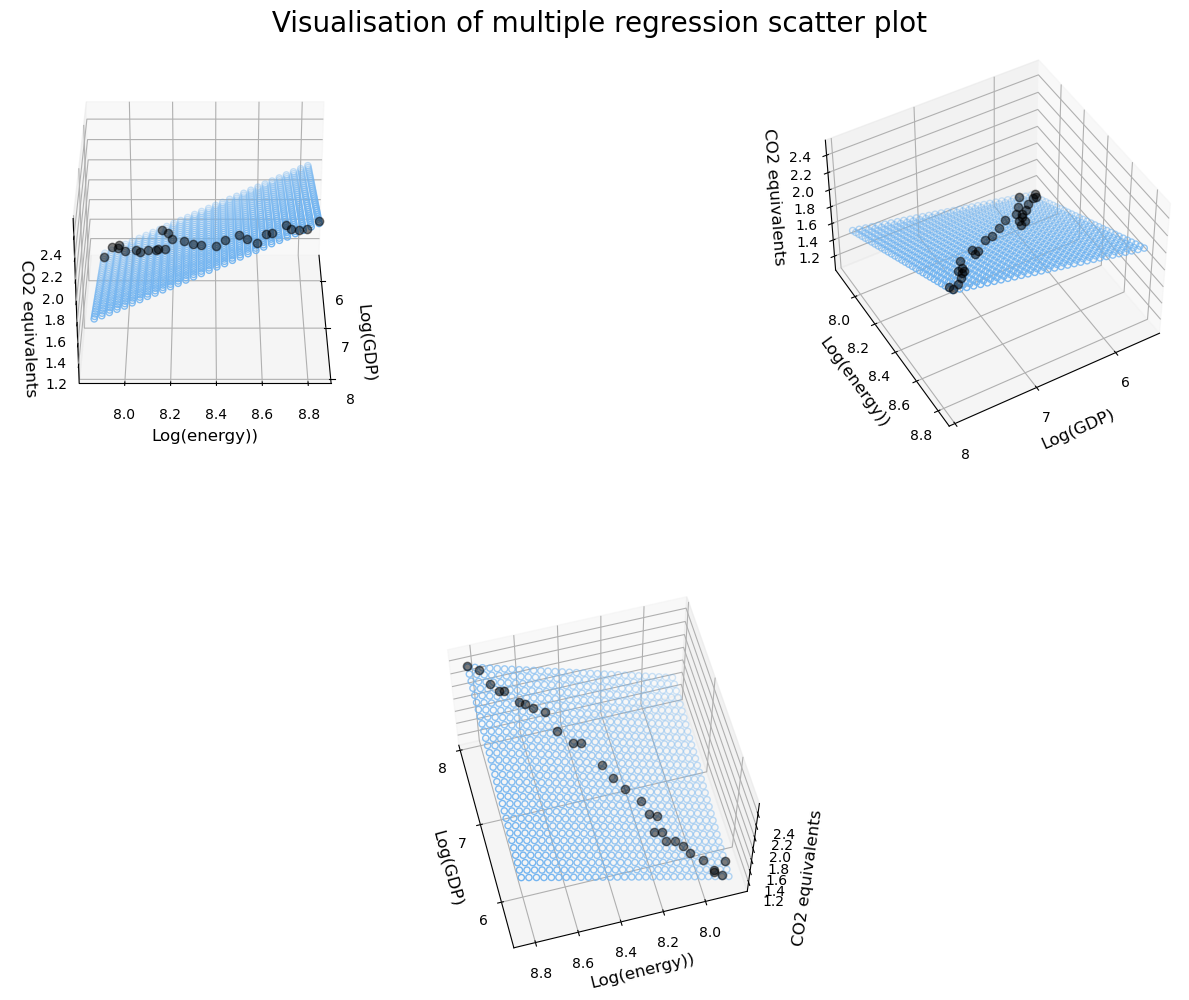

In [191]:
# Multiple linear regression scatter plot 
from mpl_toolkits.mplot3d import Axes3D
xx_pred, yy_pred = np.meshgrid(np.linspace(newdata['Log(GDP(billion US$))'].min(), newdata['Log(GDP(billion US$))'].max(), 30),np.linspace(newdata['Log(Energy consumption per capita (kWh))'].min(), newdata['Log(Energy consumption per capita (kWh))'].max(), 30))
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X2,y2)
predicted = model.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(231, projection='3d')
ax2 = fig.add_subplot(233, projection='3d')
ax3 = fig.add_subplot(235, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(newdata['Log(GDP(billion US$))'],newdata['Log(Energy consumption per capita (kWh))'],y2, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Log(GDP)', fontsize=12)
    ax.set_ylabel('Log(energy))', fontsize=12)
    ax.set_zlabel('CO2 equivalents', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=30, azim=0)
ax2.view_init(elev=45, azim=60)
ax3.view_init(elev=60, azim=165)

fig.suptitle(' Visualisation of multiple regression scatter plot',y=0.9, fontsize=20)
fig.tight_layout()

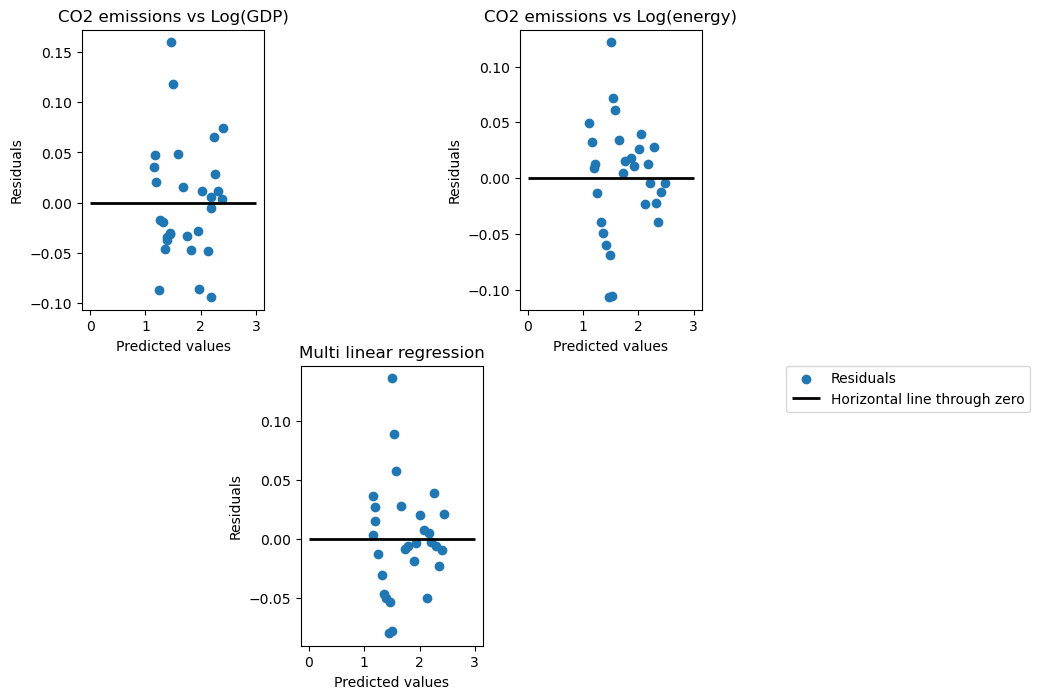

In [192]:
#Residual plot of CO2 with Log(GDP) regression
plt.figure(figsize=(8,8))
plt.subplot(2,3,1)
res=y-y_pred  #Residuals
plt.scatter(y_pred,res)
plt.hlines(y=0,xmin=0,xmax=3,linewidth=2,color='k')  # Horizontal Line through zero
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('CO2 emissions vs Log(GDP)')

#Residual plot of CO2 with Log(energy) regression
plt.subplot(2,3,3)
res1=y1-y_pred1  #Residuals
plt.scatter(y_pred1,res1)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('CO2 emissions vs Log(energy)')
plt.hlines(y=0,xmin=0,xmax=3,linewidth=2,color='k')  # Horizontal Line through zero

#Residual plot of multiple linear regression
plt.subplot(2,3,5)
res2=y2-y_pred2  #Residuals
plt.scatter(y_pred2,res2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Multi linear regression')
plt.hlines(y=0,xmin=0,xmax=3,linewidth=2,color='k')  # Horizontal Line through zero
plt.legend(['Residuals','Horizontal line through zero'],bbox_to_anchor=(4.,1),loc='upper right',borderaxespad=0)
plt.show()

In [189]:
ind_data

,Year,CO2 equivalent emissions (metric tons per capita),GDP(billion US$),Energy consumption per capita (kWh),Energy Intensity(kWh/US$)
0,1990.0,1.16,320.979026,2619.875,8.162138
1,1991.0,1.19,270.105342,2707.062,10.022245
2,1992.0,1.21,288.20843,2790.488,9.682187
3,1993.0,1.22,279.296023,2804.242,10.040394
4,1994.0,1.24,327.275584,2896.635,8.850752
5,1995.0,1.29,360.281953,3055.456,8.480736
6,1996.0,1.31,392.897054,3119.747,7.940367
7,1997.0,1.35,415.867754,3232.300,7.772423
8,1998.0,1.36,421.351478,3364.631,7.985331
9,1999.0,1.41,458.820417,3393.381,7.395881


In [78]:
# Calculating energy intensity of India
ind_data['Energy Intensity(kWh/US$)']=ind_data['Energy consumption per capita (kWh)']/ind_data['GDP(billion US$)'] 
ind_data

,Year,CO2 equivalent emissions (metric tons per capita),GDP(billion US$),Energy consumption per capita (kWh),Energy Intensity(kWh/US$)
0,1990.0,1.16,320.979026,2619.875,8.162138
1,1991.0,1.19,270.105342,2707.062,10.022245
2,1992.0,1.21,288.20843,2790.488,9.682187
3,1993.0,1.22,279.296023,2804.242,10.040394
4,1994.0,1.24,327.275584,2896.635,8.850752
5,1995.0,1.29,360.281953,3055.456,8.480736
6,1996.0,1.31,392.897054,3119.747,7.940367
7,1997.0,1.35,415.867754,3232.300,7.772423
8,1998.0,1.36,421.351478,3364.631,7.985331
9,1999.0,1.41,458.820417,3393.381,7.395881


In [61]:
#Merging GDP and energy consumption data for China
ch=df2[(df2['Unnamed: 0']=='China')| (df2['Unnamed: 1']=='Country Code')]
ch=ch.T
ch=ch.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3'],axis=0)
ch.columns=['Year','GDP (current US$)']
ch.drop(ch[((ch['Year']>=1960)&(ch['Year']<1990))|(ch['Year']>2018)].index,inplace=True)
ch['GDP(billion US$)']=ch['GDP (current US$)']*pow(10,-9)
ch1=df6[(df6['Entity']=='China')]
ch1=ch1.drop(['Entity','Code'],axis=1)
ch1.drop(ch1[((ch1['Year']>=1965)&(ch1['Year']<1990))|(ch1['Year']>2018)].index,inplace=True)
chnew=ch[["Year","GDP(billion US$)"]].merge(ch1[["Year","Energy consumption per capita (kWh)"]],on="Year",how="left")
chnew

,Year,GDP(billion US$),Energy consumption per capita (kWh)
0,1990.0,360.857913,6774.271
1,1991.0,383.373318,7021.384
2,1992.0,426.915713,7309.315
3,1993.0,444.731282,7792.128
4,1994.0,564.32467,8195.959
5,1995.0,734.547898,8373.590
6,1996.0,863.746718,8734.282
7,1997.0,961.603953,8712.993
8,1998.0,1029.043098,8656.426
9,1999.0,1093.997267,8893.213


In [72]:
#Calculating energy intensity for China
chnew['Energy Intensity(kWh/US$)']=chnew['Energy consumption per capita (kWh)']/chnew['GDP(billion US$)']
chnew

,Year,GDP(billion US$),Energy consumption per capita (kWh),Energy Intensity(kWh/US$)
0,1990.0,360.857913,6774.271,18.772682
1,1991.0,383.373318,7021.384,18.314744
2,1992.0,426.915713,7309.315,17.121213
3,1993.0,444.731282,7792.128,17.52098
4,1994.0,564.32467,8195.959,14.523482
5,1995.0,734.547898,8373.590,11.399651
6,1996.0,863.746718,8734.282,10.112087
7,1997.0,961.603953,8712.993,9.060896
8,1998.0,1029.043098,8656.426,8.412112
9,1999.0,1093.997267,8893.213,8.1291


In [107]:
#Merging GDP and energy consumption data for USA
us=df2[(df2['Unnamed: 0']=='United States')| (df2['Unnamed: 1']=='Country Code')]
us=us.T
us=us.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3'],axis=0)
us.columns=['Year','GDP (current US$)']
us.drop(us[((us['Year']>=1960)&(us['Year']<1990))|(us['Year']>2018)].index,inplace=True)
us['GDP(billion US$)']=us['GDP (current US$)']*pow(10,-9)
us1=df6[(df6['Entity']=='United States')]
us1=us1.drop(['Entity','Code'],axis=1)
us1.drop(us1[((us1['Year']>=1965)&(us1['Year']<1990))|(us1['Year']>2018)].index,inplace=True)
usnew=us[["Year","GDP(billion US$)"]].merge(us1[["Year","Energy consumption per capita (kWh)"]],on="Year",how="left")
usnew


,Year,GDP(billion US$),Energy consumption per capita (kWh)
0,1990.0,5963.144,89235.912
1,1991.0,6158.129,88264.181
2,1992.0,6520.327,88732.202
3,1993.0,6858.559,89697.594
4,1994.0,7287.236,90423.527
5,1995.0,7639.749,91348.356
6,1996.0,8073.122,93299.171
7,1997.0,8577.554457,92838.946
8,1998.0,9062.818202,92273.429
9,1999.0,9630.664202,92769.666


In [108]:
# Calculating energy intensity for USA
usnew['Energy Intensity(kWh/US$)']=usnew['Energy consumption per capita (kWh)']/usnew['GDP(billion US$)']
usnew

,Year,GDP(billion US$),Energy consumption per capita (kWh),Energy Intensity(kWh/US$)
0,1990.0,5963.144,89235.912,14.964574
1,1991.0,6158.129,88264.181,14.332954
2,1992.0,6520.327,88732.202,13.608551
3,1993.0,6858.559,89697.594,13.078198
4,1994.0,7287.236,90423.527,12.408481
5,1995.0,7639.749,91348.356,11.956984
6,1996.0,8073.122,93299.171,11.556765
7,1997.0,8577.554457,92838.946,10.823475
8,1998.0,9062.818202,92273.429,10.181538
9,1999.0,9630.664202,92769.666,9.632738


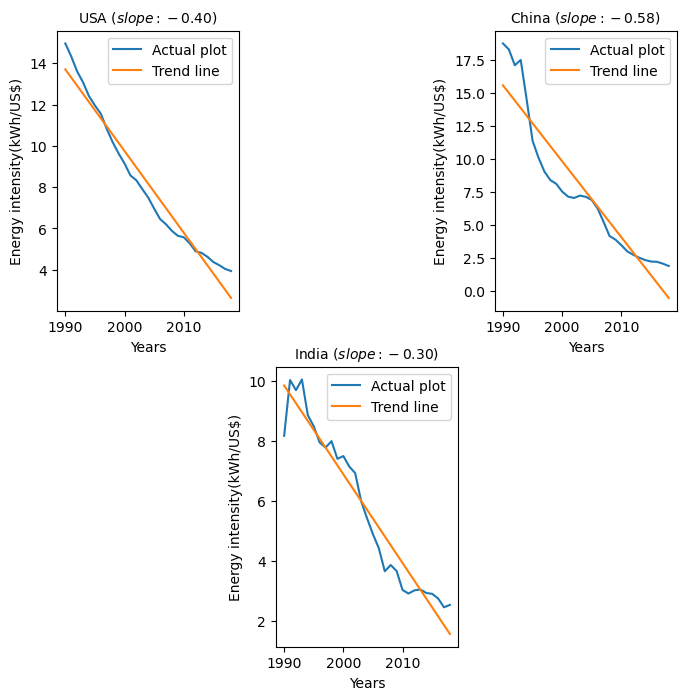

In [122]:
# Plotting trend line for USA
plt.figure(figsize=(8,8))
plt.subplot(2,3,1)
x1=usnew['Year']
y1=usnew['Energy Intensity(kWh/US$)']
x1=np.array(x1,dtype=float)
y1=np.array(y1,dtype=float)
z1=np.polyfit(x1,y1,1)  # finding the least square polynomial fit
p1 = np.poly1d(z1)  # Define the polynomial function
plt.plot(x1,y1)
plt.plot(x1,p1(x1))
plt.xlabel('Years')
plt.ylabel('Energy intensity(kWh/US$)')
plt.legend(['Actual plot','Trend line'])
plt.title('USA'" " "$ (slope:%.2f$)" %z1[0],fontsize=10)

# Plotting trend line for China
plt.subplot(2,3,3)
x2=chnew['Year']
y2=chnew['Energy Intensity(kWh/US$)']
x2=np.array(x2,dtype=float)
y2=np.array(y2,dtype=float)
z2=np.polyfit(x2,y2,1)  # finding the least square polynomial fit
p2 = np.poly1d(z2)  # Define the polynomial function
plt.plot(x2,y2)
plt.plot(x2,p2(x2))
plt.xlabel('Years')
plt.ylabel('Energy intensity(kWh/US$)')
plt.legend(['Actual plot','Trend line'])
plt.title('China'" " "$ (slope:%.2f$)" %z2[0],fontsize=10)

# Plotting trend line for India
plt.subplot(2,3,5)
x3=ind_data['Year']
y3=ind_data['Energy Intensity(kWh/US$)']
x3=np.array(x3,dtype=float)
y3=np.array(y3,dtype=float)
z3=np.polyfit(x3,y3,1)  # finding the least square polynomial fit
p3 = np.poly1d(z3)  # Define the polynomial function
plt.plot(x3,y3)
plt.plot(x3,p3(x3))
plt.xlabel('Years')
plt.ylabel('Energy intensity(kWh/US$)')
plt.legend(['Actual plot','Trend line'])
plt.title('India'" " "$ (slope:%.2f$)" %z3[0],fontsize=10)
plt.show()

